In [1]:
# Importing libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras import layers, models

In [2]:
(X_train, y_train),(X_test, y_test) = imdb.load_data(num_words=10000)

In [3]:
def encode(sequences, dimensions=10000):
    results = np.zeros((len(sequences), dimensions))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [4]:
X_train = encode(X_train)
X_test = encode(X_test)

In [5]:
network = models.Sequential()
network.add(layers.Dense(16, activation="relu", input_shape=(10000,)))
network.add(layers.Dense(16, activation="relu"))
network.add(layers.Dense(1, activation="sigmoid"))

In [6]:
network.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=['accuracy'])

In [7]:
# Creating validating set
val_X_set = X_train[:10000]
X = X_train[10000:]

val_y_set = y_train[:10000]
y = y_train[10000:]

In [9]:
history = network.fit(x=X, y=y, epochs=20, batch_size=512, validation_data=(val_X_set, val_y_set))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 264us/sample - loss: 0.5208 - accuracy: 0.7805 - val_loss: 0.3997 - val_accuracy: 0.8650
Epoch 2/20
15000/15000 [==============================] - 2s 125us/sample - loss: 0.3166 - accuracy: 0.9009 - val_loss: 0.3242 - val_accuracy: 0.8749
Epoch 3/20
15000/15000 [==============================] - 2s 126us/sample - loss: 0.2325 - accuracy: 0.9242 - val_loss: 0.2795 - val_accuracy: 0.8918
Epoch 4/20
15000/15000 [==============================] - 2s 123us/sample - loss: 0.1864 - accuracy: 0.9391 - val_loss: 0.2727 - val_accuracy: 0.8914
Epoch 5/20
15000/15000 [==============================] - 2s 126us/sample - loss: 0.1501 - accuracy: 0.9527 - val_loss: 0.2761 - val_accuracy: 0.8897
Epoch 6/20
15000/15000 [==============================] - 2s 123us/sample - loss: 0.1243 - accuracy: 0.9622 - val_loss: 0.2993 - val_accuracy: 0.8820
Epoch 7/20
15000/15000 [==========================

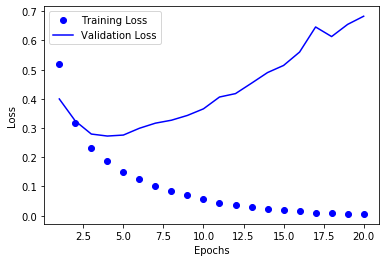

In [10]:
# Visualizing training and validation loss during fitting
show_loss(history.history, epochs = 20)

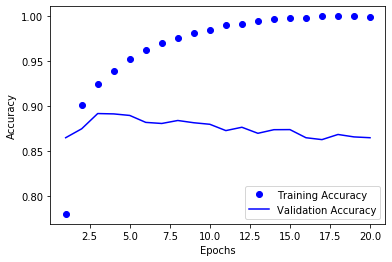

In [11]:
# Visualizing training and validation accuracy during fitting
show_accuracy(history.history, epochs = 20)

### Some overfitting is occuring..

We can see that our model, perform exceptionally well on training data, this is not a good thing, since, on the other side 
model fails to bring that accuracy on testing data.
Lets see how our model does on original data

In [12]:
network.fit(X_train, y_train, epochs=4, batch_size=512)

Train on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 2s 80us/sample - loss: 0.2220 - accuracy: 0.9479
Epoch 2/4
25000/25000 [==============================] - 2s 76us/sample - loss: 0.1306 - accuracy: 0.9615
Epoch 3/4
25000/25000 [==============================] - 2s 77us/sample - loss: 0.1001 - accuracy: 0.9709
Epoch 4/4
25000/25000 [==============================] - 2s 78us/sample - loss: 0.0785 - accuracy: 0.9772


In [47]:
# Visualizing training and validation accuracy during fitting
def show_accuracy(history_dict, epochs = 5):
    plt.xlim(1, epochs)
    epochs = range(1, epochs+1)
    acc = history_dict["accuracy"]
    val_acc = history_dict["val_accuracy"]
    plt.ylim(0, 1)
    plt.axis('scaled')
    plt.plot(epochs, acc, 'bo', label="Training Accuracy")
    plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

def show_loss(history_dict, epochs = 5):
    plt.xlim(1, epochs)
    epochs = range(1, epochs+1)
    loss = history_dict['loss']
    val_loss = history_dict['val_loss']
    plt.ylim(0, 1)
    plt.axis('scaled')
    plt.plot(epochs, loss, 'bo', label="Training Loss")
    plt.plot(epochs, val_loss, 'b', label="Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

### Neural Network having only one hidden layer of 16 units

In [13]:
# Making a new neural network having only one hidden layer
network = models.Sequential()
network.add(layers.Dense(16, activation="relu", input_shape=(10000,)))
network.add(layers.Dense(1, activation="sigmoid"))

In [14]:
network.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

In [15]:
history = network.fit(X, y, epochs=20, validation_data=(val_X_set, val_y_set))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 6s 387us/sample - loss: 0.3458 - accuracy: 0.8588 - val_loss: 0.2771 - val_accuracy: 0.8874
Epoch 2/20
15000/15000 [==============================] - 5s 311us/sample - loss: 0.2043 - accuracy: 0.9223 - val_loss: 0.2776 - val_accuracy: 0.8917
Epoch 3/20
15000/15000 [==============================] - 5s 311us/sample - loss: 0.1630 - accuracy: 0.9384 - val_loss: 0.3025 - val_accuracy: 0.8863
Epoch 4/20
15000/15000 [==============================] - 5s 314us/sample - loss: 0.1352 - accuracy: 0.9499 - val_loss: 0.3304 - val_accuracy: 0.8835
Epoch 5/20
15000/15000 [==============================] - 5s 315us/sample - loss: 0.1160 - accuracy: 0.9565 - val_loss: 0.3616 - val_accuracy: 0.8802
Epoch 6/20
15000/15000 [==============================] - 5s 312us/sample - loss: 0.1013 - accuracy: 0.9608 - val_loss: 0.3841 - val_accuracy: 0.8784
Epoch 7/20
15000/15000 [==========================

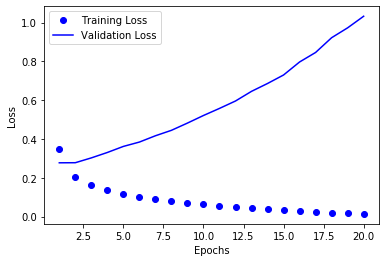

In [16]:
# Visualizing training and validation loss during fitting
show_loss(history.history, epochs = 20)

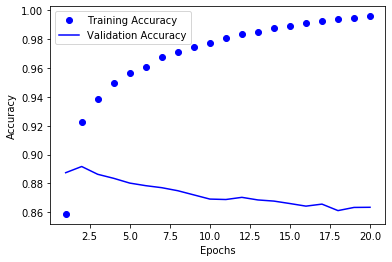

In [17]:
#Visualizing training and validation accuracy during fitting
show_accuracy(history.history, epochs = 20)

### Network having 3 dense layers of 16 units

In [18]:
network = models.Sequential()
network.add(layers.Dense(16, activation="relu", input_shape=(10000,)))
network.add(layers.Dense(16, activation="relu"))
network.add(layers.Dense(16, activation="relu"))
network.add(layers.Dense(1, activation="sigmoid"))

In [19]:
network.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=['accuracy'])

In [20]:
history = network.fit(X, y, epochs = 5, batch_size=512, validation_data=(val_X_set, val_y_set))

Train on 15000 samples, validate on 10000 samples
Epoch 1/5
15000/15000 [==============================] - 3s 214us/sample - loss: 0.5349 - accuracy: 0.7634 - val_loss: 0.3954 - val_accuracy: 0.8676
Epoch 2/5
15000/15000 [==============================] - 2s 124us/sample - loss: 0.3083 - accuracy: 0.9004 - val_loss: 0.3140 - val_accuracy: 0.8811
Epoch 3/5
15000/15000 [==============================] - 2s 126us/sample - loss: 0.2156 - accuracy: 0.9301 - val_loss: 0.2873 - val_accuracy: 0.8859
Epoch 4/5
15000/15000 [==============================] - 2s 124us/sample - loss: 0.1685 - accuracy: 0.9437 - val_loss: 0.2878 - val_accuracy: 0.8850
Epoch 5/5
15000/15000 [==============================] - 2s 125us/sample - loss: 0.1335 - accuracy: 0.9567 - val_loss: 0.2981 - val_accuracy: 0.8817


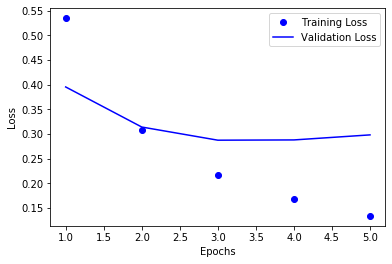

In [21]:
show_loss(history.history, epochs = 5)

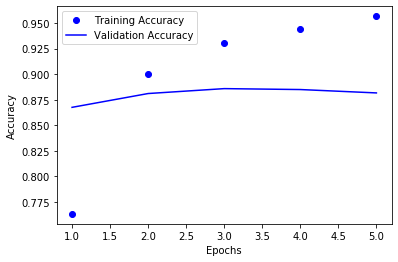

In [22]:
show_accuracy(history.history, epochs = 5)

Lets see how well this network will perform on original data

In [23]:
network = models.Sequential()
network.add(layers.Dense(16, activation="relu", input_shape=(10000,)))
network.add(layers.Dense(16, activation="relu"))
network.add(layers.Dense(16, activation="relu"))
network.add(layers.Dense(1, activation="sigmoid"))

In [24]:
network.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=['accuracy'])

In [25]:
result = network.fit(X_train, y_train, epochs=5, batch_size=512)

Train on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 3s 122us/sample - loss: 0.4760 - accuracy: 0.8016
Epoch 2/5
25000/25000 [==============================] - 2s 77us/sample - loss: 0.2499 - accuracy: 0.9092
Epoch 3/5
25000/25000 [==============================] - 2s 78us/sample - loss: 0.1940 - accuracy: 0.9287
Epoch 4/5
25000/25000 [==============================] - 2s 77us/sample - loss: 0.1576 - accuracy: 0.9427
Epoch 5/5
25000/25000 [==============================] - 2s 77us/sample - loss: 0.1382 - accuracy: 0.9491


In [26]:
result = network.evaluate(X_test, y_test)

25000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

## Using MSE loss function instead of binary_crossentropy

In [50]:
network = models.Sequential()
network.add(layers.Dense(16, activation="relu", input_shape=(10000,)))
network.add(layers.Dense(16, activation="relu"))
network.add(layers.Dense(1, activation="sigmoid"))

In [51]:
network.compile(optimizer="rmsprop", loss="mse", metrics=["accuracy"])

In [52]:
history = network.fit(X, y, epochs = 5, batch_size=512, validation_data=(val_X_set, val_y_set))

Train on 15000 samples, validate on 10000 samples
Epoch 1/5
15000/15000 [==============================] - 3s 192us/sample - loss: 0.1806 - accuracy: 0.7851 - val_loss: 0.1284 - val_accuracy: 0.8741
Epoch 2/5
15000/15000 [==============================] - 2s 124us/sample - loss: 0.0987 - accuracy: 0.9025 - val_loss: 0.1018 - val_accuracy: 0.8795
Epoch 3/5
15000/15000 [==============================] - 2s 125us/sample - loss: 0.0696 - accuracy: 0.9277 - val_loss: 0.0938 - val_accuracy: 0.8810
Epoch 4/5
15000/15000 [==============================] - 2s 127us/sample - loss: 0.0526 - accuracy: 0.9471 - val_loss: 0.1023 - val_accuracy: 0.8605
Epoch 5/5
15000/15000 [==============================] - 2s 125us/sample - loss: 0.0422 - accuracy: 0.9573 - val_loss: 0.0839 - val_accuracy: 0.8877


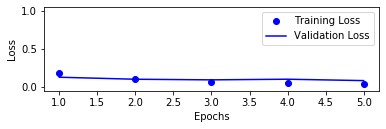

In [53]:
show_loss(history.history, epochs = 5)

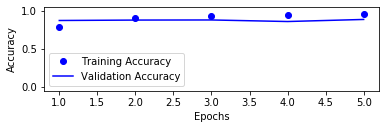

In [54]:
show_accuracy(history.history, epochs = 5)

In [36]:
# Fitting original data into this network
network.fit(X_train, y_train, epochs = 5, batch_size=512)

Train on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 3s 114us/sample - loss: 0.1482 - accuracy: 0.8256
Epoch 2/5
25000/25000 [==============================] - 2s 78us/sample - loss: 0.0785 - accuracy: 0.9105
Epoch 3/5
25000/25000 [==============================] - 2s 77us/sample - loss: 0.0589 - accuracy: 0.9308
Epoch 4/5
25000/25000 [==============================] - 2s 76us/sample - loss: 0.0480 - accuracy: 0.9441
Epoch 5/5
25000/25000 [==============================] - 2s 77us/sample - loss: 0.0402 - accuracy: 0.9548


In [37]:
# evaluating performance on testing data
result = network.evaluate(X_test, y_test)

25000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

### Using TANH as activation function of hidden layers instead of RELU

In [96]:
network = models.Sequential()
network.add(layers.Dense(16, activation="tanh", input_shape=(10000,)))
network.add(layers.Dense(16, activation="tanh"))
# network.add(layers.Dense(32, activation="tanh"))
network.add(layers.Dense(1, activation="sigmoid"))

In [97]:
network.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=['accuracy'])

In [93]:
history = network.fit(X, y, epochs = 5, batch_size=512, validation_data=(val_X_set, val_y_set))

Train on 15000 samples, validate on 10000 samples
Epoch 1/5
15000/15000 [==============================] - 3s 204us/sample - loss: 0.4725 - accuracy: 0.7941 - val_loss: 0.3445 - val_accuracy: 0.8761
Epoch 2/5
15000/15000 [==============================] - 2s 125us/sample - loss: 0.2634 - accuracy: 0.9113 - val_loss: 0.3060 - val_accuracy: 0.8728
Epoch 3/5
15000/15000 [==============================] - 2s 126us/sample - loss: 0.1901 - accuracy: 0.9323 - val_loss: 0.3054 - val_accuracy: 0.8765
Epoch 4/5
15000/15000 [==============================] - 2s 128us/sample - loss: 0.1454 - accuracy: 0.9487 - val_loss: 0.2861 - val_accuracy: 0.8855
Epoch 5/5
15000/15000 [==============================] - 2s 127us/sample - loss: 0.1074 - accuracy: 0.9642 - val_loss: 0.3222 - val_accuracy: 0.8790


## Here some awesome stuff happened, our validation accuracy showed some improvement after using tanh activation function

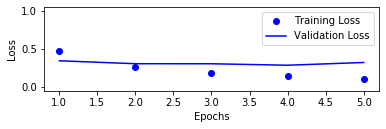

In [94]:
show_loss(history.history, epochs = 5)

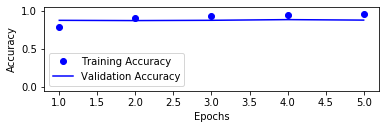

In [95]:
show_accuracy(history.history, epochs = 5)

In [98]:
# Fitting original data
network.fit(X_train, y_train, epochs = 5, batch_size = 512)

Train on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 3s 123us/sample - loss: 0.4237 - accuracy: 0.8298
Epoch 2/5
25000/25000 [==============================] - 2s 81us/sample - loss: 0.2382 - accuracy: 0.9144
Epoch 3/5
25000/25000 [==============================] - 2s 81us/sample - loss: 0.1792 - accuracy: 0.9352
Epoch 4/5
25000/25000 [==============================] - 2s 80us/sample - loss: 0.1453 - accuracy: 0.9492
Epoch 5/5
25000/25000 [==============================] - 2s 82us/sample - loss: 0.1297 - accuracy: 0.9548


In [99]:
result = network.evaluate(X_test, y_test)

25000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================